In [1]:
from qiskit import Aer, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('aer_simulator')

<IPython.core.display.Latex object>

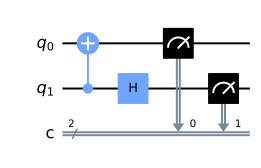

{'00': 1024}

In [3]:
# Alice and Bob, but with quantum mechanics.

# The message
MESSAGE = '00'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1] == '1':
  qc_alice.x(0)
if MESSAGE[-2] == '1':
  qc_alice.x(1)

ket = Statevector(qc_alice)
display(ket.draw(output='latex'))

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

qc_bob = QuantumCircuit(2, 2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0, 1], [0, 1])

display(qc_bob.draw(output='mpl'))

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

In [4]:
MESSAGE = '11'

qc_alice = QuantumCircuit(2, 2)

qc_alice.h(1)
qc_alice.cx(1, 0)

# Note that this part has changed to take advantage of the entangled state.
if MESSAGE[-1] == '1':
  qc_alice.x(1) # Before: qc_alice.x(0)
if MESSAGE[-2] == '1':
  qc_alice.z(1) # Before: qc_alice.x(1)

# As we are storing the message only in the qubit q1, Alice could have
# sended the qubit q0 as soon as she had the entangled pair, even
# before she knew the message!

ket = Statevector(qc_alice)
display(ket.draw(output='latex'))

# Since Bob is receiving the same states as before its circuit
# doesn't need to change.

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

<IPython.core.display.Latex object>

{'11': 1024}

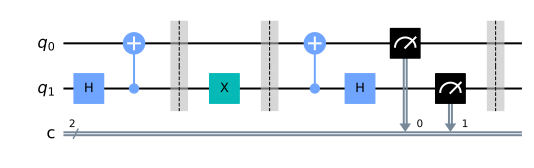

{'01': 1024}

In [5]:
# The process above can be modified so Alice send only 1 qubit to Bob:
# A third party can directly send one qubit to Bob, and then the
# other to Alice
# Alice can encode her two qubit message by manipulating just
# this single qubit, and send only this one qubit to Bob

# Charlie is the third party
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1, 0)

# Alice cuircuit
MESSAGE = '01'

qc_alice = QuantumCircuit(2, 2)

# Alice can send 2 bits of information to Bob only using 1 qubit!

if MESSAGE[-1] == '1':
  qc_alice.x(1)
if MESSAGE[-2] == '1':
  qc_alice.z(1)

# Improve circuit visualization
qc_bob.barrier()
qc_alice.barrier()
qc_charlie.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
display(complete_qc.draw(output='mpl'))
backend.run(complete_qc).result().get_counts()

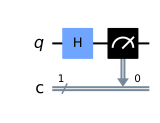

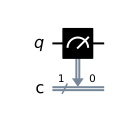

In [6]:
# X measurement
meas_x = QuantumCircuit(1, 1)
meas_x.h(0)
meas_x.measure(0, 0)

display(meas_x.draw(output='mpl'))

# Z measurement
meas_z = QuantumCircuit(1, 1)
meas_z.measure(0, 0)

display(meas_z.draw(output='mpl'))

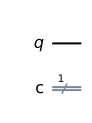

Results from z measurement: {'0': 1024}
Results from x measurement: {'1': 502, '0': 522}


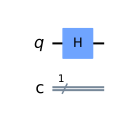

Results from z measurement: {'1': 543, '0': 481}
Results from x measurement: {'0': 1024}


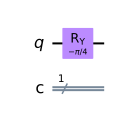

Results from z measurement: {'1': 140, '0': 884}
Results from x measurement: {'0': 143, '1': 881}


In [7]:
from math import pi

# Some not so intuitive results as a result of the uncertain principle

qc = QuantumCircuit(1,1)

display(qc.draw(output='mpl'))

for basis, circ in [('z', meas_z), ('x', meas_x)]:
  print('Results from ' + basis + ' measurement:',
    backend.run(qc.compose(circ)).result().get_counts())

qc = QuantumCircuit(1,1)
qc.h(0)

display(qc.draw(output='mpl'))

for basis, circ in [('z', meas_z), ('x', meas_x)]:
  print('Results from ' + basis + ' measurement:',
    backend.run(qc.compose(circ)).result().get_counts())

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

display(qc.draw(output='mpl'))

for basis, circ in [('z', meas_z), ('x', meas_x)]:
  print('Results from ' + basis + ' measurement:',
    backend.run(qc.compose(circ)).result().get_counts())

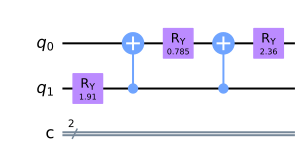

Results for a z and a z measurement:


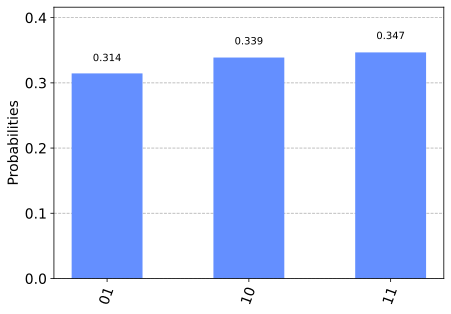

Results for a z and an x measurement:


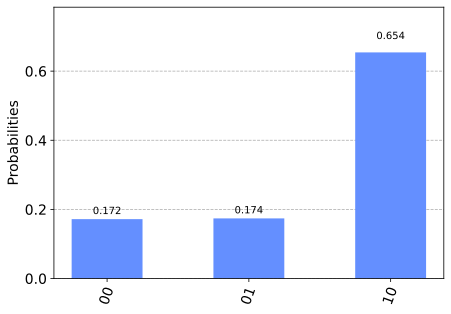

Results for a x and a z measurement:


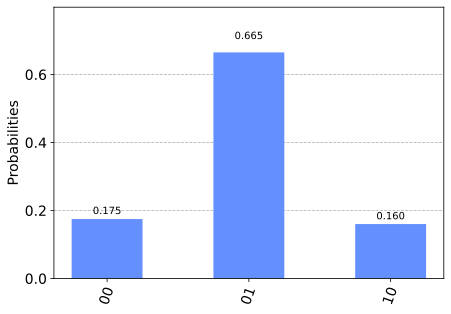

Results for a x and a x measurement:


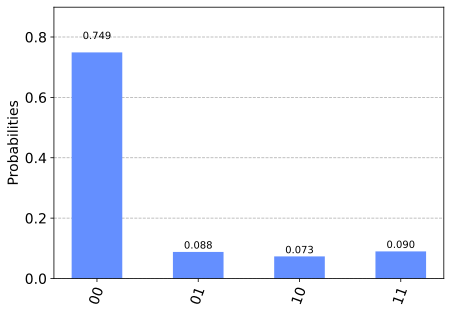

In [8]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911, 1)
qc_charlie.cx(1, 0)
qc_charlie.ry(0.785, 0)
qc_charlie.cx(1, 0)
qc_charlie.ry(2.356, 0)

display(qc_charlie.draw(output='mpl'))

meas_zz = QuantumCircuit(2, 2)
meas_zz.measure([0, 1], [0, 1])

print('Results for a z and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
display(plot_histogram(counts))

meas_zx = QuantumCircuit(2, 2)
meas_zx.h(0)
meas_zx.measure([0, 1], [0, 1])

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
display(plot_histogram(counts))

meas_xz = QuantumCircuit(2, 2)
meas_xz.h(1)
meas_xz.measure([0, 1],[0, 1])

print('Results for a x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
display(plot_histogram(counts))

meas_xx = QuantumCircuit(2, 2)
meas_xx.h([0, 1])
meas_xx.measure([0, 1], [0, 1])

print('Results for a x and a x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

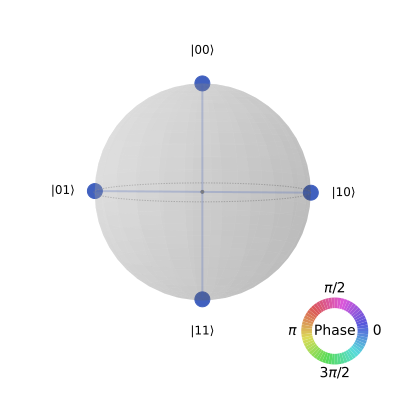

{'01': 279, '10': 221, '00': 256, '11': 268}

In [9]:
# Other ways to see the state of a circuit

qc = QuantumCircuit(2)
qc.h([0, 1])

ket = Statevector(qc)
display(ket.draw(output='qsphere'))

qc.measure_all()

backend.run(qc).result().get_counts()